#  <center> #FUNWITHDATA </center>    
#### <center>Notebook 1 : Simple Linear Regression</center>
This notebook outlines the use of scikit-learn to implement simple linear regression (SLR). Main activities are:
 - **Download dataset** on fuel consumption and Carbon dioxide emission of cars
 - **Split the data** into training and test sets
 - **Create a model** using the training set
 - **Evaluate the model** using the test set
 - **Predict unknown values** from the model

### Import packages

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
from scipy import stats
%matplotlib inline

This notebook was created using anaconda, **wget** has to be installed first before it can be used to download files in the notebook. Then the wget package must be imported. 

## Read the data from the csv file downloaded

The dataset for this project is available for download on [GitHub-wgova](https://github.com/wgova/Car_emissions)

In [6]:
data = "https://raw.githubusercontent.com/wgova/Car_emissions/master/Emissions_Full.csv"
df = pd.read_csv(data)


## Description of the data

The data contains a 2014 fuel consumption dataset with model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. For the pursposes of this project, only numerical variables will be extracted for modelling. 

- **MAKE** e.g. Acura
- **MODEL** include 4WD/4X4 = Four-wheel drive,  AWD = All-wheel drive, CNG = Compressed natural gas, FFV = Flexible-fuel vehicle, NGV = Natural gas vehicle
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** A = Automatic, AM = Automated manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 – 10 = Number of gears
- **FUEL CONSUMPTION (City,HWY,COMB)** City and highway fuel consumption ratings litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) in L/100 km and in miles per gallon (mpg)
- **CO2 EMISSIONS (g/km)** Estimated tailpipe carbon dioxide emissions (in grams per kilometre) based on fuel type and the combined fuel consumption rating.
- **FUELTYPE** - X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = Natural Gas

### Data Exploration
Summary descriptive exploration on the dataset

In [3]:
# summarize the data
df.describe() # To visualise summary statistics for the full dataset
#df.describe(include=['object']) # To get a summary of categorical data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Check if there are observations with missing values in the dataset

In [4]:
missing_data = df.isnull() # Ensure that there are no missing values in the dataset

#for column in missing_data.columns.values.tolist(): #Count missing values in each column
#    print(column)
#    print (missing_data[column].value_counts())
#    print(" \n ") 

The dataset seems to be complete, with no missing values. Some of the column names are a bit long and need to be shortened to improve the aesthetics of some of the charts later

In [5]:
df.rename(columns={'FUELCONSUMPTION_CITY':'City_FC', 'FUELCONSUMPTION_HWY':'HWY_FC','FUELCONSUMPTION_COMB':'COMB_FC','FUELCONSUMPTION_COMB_MPG':'COMB_MPG_FC'}, inplace=True)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,City_FC,HWY_FC,COMB_FC,COMB_MPG_FC,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


A feature that might be important to model emisisons is **fuel type**, but its is not numerical, but categorical. In order to turn it into numeric values, **"One-hot" encoding** is used to create dummy variables which will assign '0' when the feature is absent or '1' for the feature present

In [6]:
dummy_fuel = pd.get_dummies(df['FUELTYPE'])
#dummy_fuel.head()
#dummy_fuel.describe()

dummy_fuel.rename(columns={
    'D':'Diesel', 'E':'Ethanol','X':'Gasoline','Z':'Prem_Gasoline'
}, inplace=True)
dummy_fuel.head()
#merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_fuel], axis=1)

# drop original column "fuel-type" from "df"
df.drop("FUELTYPE", axis = 1, inplace=True)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,City_FC,HWY_FC,COMB_FC,COMB_MPG_FC,CO2EMISSIONS,Diesel,Ethanol,Gasoline,Prem_Gasoline
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,33,196,0,0,0,1
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,29,221,0,0,0,1
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,48,136,0,0,0,1
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,25,255,0,0,0,1
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,27,244,0,0,0,1


In order to visualisation a statistical distribution of variables in the dataset, histograms will be plotted for all features.

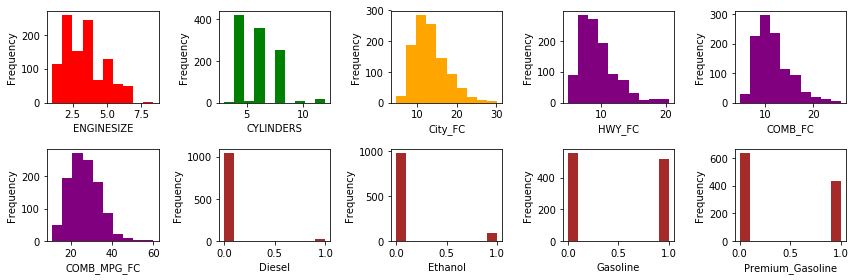

In [7]:
plt.figure(figsize=(12,4 ))

plt.subplot(2, 5, 1)
plt.hist(df['ENGINESIZE'],color = 'red') ; plt.xlabel("ENGINESIZE") ; plt.ylabel("Frequency")

plt.subplot(2, 5, 2)
plt.hist(df['CYLINDERS'],color = 'green') ; plt.xlabel("CYLINDERS") ; plt.ylabel("Frequency")

plt.subplot(2, 5, 3)
plt.hist(df['City_FC'], color = 'orange'); plt.xlabel("City_FC"); plt.ylabel("Frequency")

plt.subplot(2, 5, 4)
plt.hist(df['HWY_FC'], color = 'purple'); plt.xlabel("HWY_FC"); plt.ylabel("Frequency")

plt.subplot(2, 5, 5)
plt.hist(df['COMB_FC'], color = 'purple'); plt.xlabel("COMB_FC"); plt.ylabel("Frequency")

plt.subplot(2, 5, 6)
plt.hist(df['COMB_MPG_FC'], color = 'purple'); plt.xlabel("COMB_MPG_FC"); plt.ylabel("Frequency")

plt.subplot(2, 5, 7)
plt.hist(df['Diesel'], color = 'brown'); plt.xlabel("Diesel"); plt.ylabel("Frequency")

plt.subplot(2, 5, 8)
plt.hist(df['Ethanol'], color = 'brown'); plt.xlabel("Ethanol"); plt.ylabel("Frequency")

plt.subplot(2, 5, 9)
plt.hist(df['Gasoline'], color = 'brown'); plt.xlabel("Gasoline"); plt.ylabel("Frequency")

plt.subplot(2, 5, 10)
plt.hist(df['Prem_Gasoline'], color = 'brown'); plt.xlabel("Premium_Gasoline"); plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

This dataset has fewer **ethanol** and **diesel** cars compared to **gasoline** and **premium-gasoline**. This suggests that **Fuel type** this will not be a good feature to model with, for this particular dataset, more data is needed.

**Features engineering**

A data subset consisting of possible strong  predictors of carbon dioxide emissions, based on amount of data available is created here

In [8]:
adf = df[['ENGINESIZE','CYLINDERS','City_FC','HWY_FC','COMB_FC','COMB_MPG_FC',
          'Gasoline','Prem_Gasoline','CO2EMISSIONS']]

Possible predictors for emissions which can be candidates for modelling will be identified using a correlation matrix, seeking coefficients above 0.7 

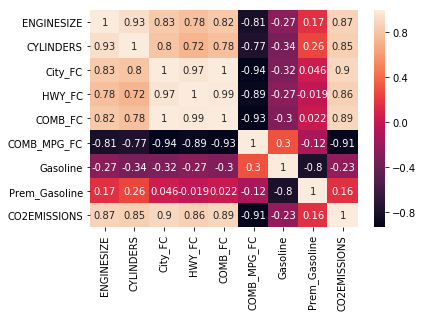

In [9]:
corr = adf.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True) 
plt.show()

The strong correlations of **fuel consumption** (City_FC,HWY_FC,COMB_FC and COMB_MPG_FC), **Enginesize** and **Cylinders** might not be statistically significant enough for modelling. **Pearson Correlation P-values** will be used to test the strength of correlation between each feature to emissions. The Pearson Correlation Coefficent (**PCC**) and **P-value** will be recorded for each feature 

In [10]:
def calculate_pvalues(adf):
    df = adf.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=adf.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [11]:
df_corr = adf.corr()
pval = calculate_pvalues(adf) 
# create three masks for p-values
r1 = df_corr.applymap(lambda x: '{:.2f}*'.format(x)) 
r2 = df_corr.applymap(lambda x: '{:.2f}**'.format(x))
r3 = df_corr.applymap(lambda x: '{:.2f}***'.format(x))
r4 = df_corr.applymap(lambda x: '{:.2f}'.format(x))
# applying these masks to the correlation matrix
df_corr = df_corr.mask(pval>.1,r4)
df_corr = df_corr.mask(pval<=.1,r1)
df_corr = df_corr.mask(pval<=.05,r2)
df_corr = df_corr.mask(pval<=.01,r3)
#[df_corr.mask(pval<=p,df_corr.applymap(lambda x: '{:.2f}*'.format(x)),inplace=True) for p in [.1,.05,.01]]
df_corr

,ENGINESIZE,CYLINDERS,City_FC,HWY_FC,COMB_FC,COMB_MPG_FC,Gasoline,Prem_Gasoline,CO2EMISSIONS
ENGINESIZE,1.00***,0.93***,0.83***,0.78***,0.82***,-0.81***,-0.27***,0.17***,0.87***
CYLINDERS,0.93***,1.00***,0.80***,0.72***,0.78***,-0.77***,-0.34***,0.26***,0.85***
City_FC,0.83***,0.80***,1.00***,0.97***,1.00***,-0.94***,-0.32***,0.05,0.90***
HWY_FC,0.78***,0.72***,0.97***,1.00***,0.99***,-0.89***,-0.27***,-0.02,0.86***
COMB_FC,0.82***,0.78***,1.00***,0.99***,1.00***,-0.93***,-0.30***,0.02,0.89***
COMB_MPG_FC,-0.81***,-0.77***,-0.94***,-0.89***,-0.93***,1.00***,0.30***,-0.12***,-0.91***
Gasoline,-0.27***,-0.34***,-0.32***,-0.27***,-0.30***,0.30***,1.00***,-0.80***,-0.23***
Prem_Gasoline,0.17***,0.26***,0.05,-0.02,0.02,-0.12***,-0.80***,1.00***,0.16***
CO2EMISSIONS,0.87***,0.85***,0.90***,0.86***,0.89***,-0.91***,-0.23***,0.16***,1.00***


In order to verify that the masks worked, the PCC and p-values will be displayed

In [12]:
import itertools
correlations = {}
columns = adf.columns.tolist()

for col_a, CO2EMISSIONS in itertools.combinations(columns, 2):
    correlations[col_a] = stats.pearsonr(adf.loc[:, col_a], adf.loc[:, CO2EMISSIONS])

result = adf.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
rho = result.sort_index()
print(result.sort_index())

                    PCC        p-value
COMB_FC        0.892129   0.000000e+00
COMB_MPG_FC   -0.906394   0.000000e+00
CYLINDERS      0.849685  2.770937e-298
City_FC        0.898039   0.000000e+00
ENGINESIZE     0.874154   0.000000e+00
Gasoline      -0.230304   2.602792e-14
HWY_FC         0.861748  3.918656e-316
Prem_Gasoline  0.160804   1.285456e-07


To verify the results above:

In [13]:
pearson_coef, p_value = stats.pearsonr(df["Prem_Gasoline"], df["CO2EMISSIONS"])
print("Coeff:", pearson_coef, " \nP-value of", p_value)  


Coeff: 0.16080415195844616  
P-value of 1.2854560306331895e-07


The **p-value** and correlations for **fuel consumption** (City_FC,HWY_FC,COMB_FC and COMB_MPG_FC), **Enginesize** and **Cylinders** are **less than 0.01** for all the features. This suggests that the **correlation** is significntly differenct from **zero** to be ignored. All 8 features show strong evidence that their correlation to emissions is significant

In order to make a preliminary judgement on whether a linear relation exists between each individual feature and carbon emissions, a scatter plot is plotted for each feature vs emissions, and a line of best fit is drawn.

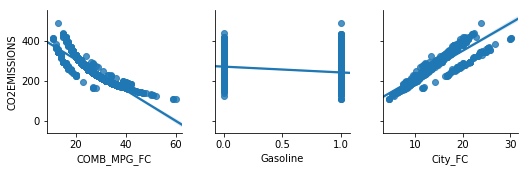

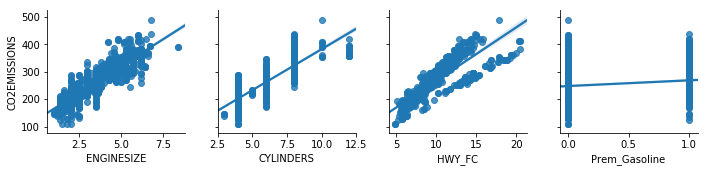

In [303]:
sns.pairplot(adf, x_vars=["COMB_MPG_FC","Gasoline","City_FC"], 
             y_vars="CO2EMISSIONS", kind = 'reg')
sns.pairplot(adf, x_vars=["ENGINESIZE","CYLINDERS",
                          "HWY_FC","Prem_Gasoline"], y_vars="CO2EMISSIONS", kind = 'reg')

**Fuel consumption_city** seems to have the strongest correlation to emissions

#### Create training and testing dataset from our 
The dataset is split into training and testing sets, in the ratio 70%: 30% respectively using a mask to select random rows.

In [305]:
from sklearn.model_selection import train_test_split as tts

# Split data into test (30%) and training (70%) sets
train_data, test_data = tts(adf,train_size=0.7)

print("Training samples", train_data.shape[0])
print("Testing samples: ", test_data.shape[0])

Training samples 746
Testing samples:  321


### Simple Regression Model
The goal for a Linear Regression is to fit a linear model to **minimize the residual sum of squares** (MSE) between the independent x in the dataset, and the dependent y by the linear approximation. In other words, maximise the number of observations used to train the model. 

#### Train data distribution
Check how representative the distribution of the training dataset is of the full data

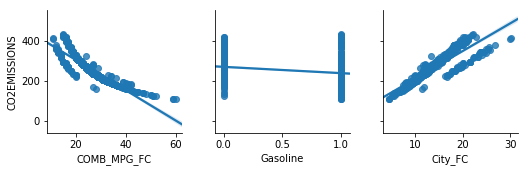

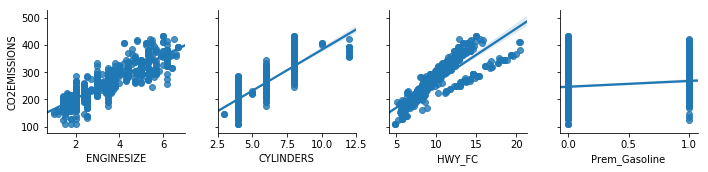

In [306]:
sns.pairplot(train_data, x_vars=["COMB_MPG_FC","Gasoline","City_FC"], 
             y_vars="CO2EMISSIONS", kind = 'reg')
sns.pairplot(train_data, x_vars=["ENGINESIZE","CYLINDERS",
                          "HWY_FC","Prem_Gasoline"], y_vars="CO2EMISSIONS", kind = 'reg')

#### Modeling
Using sklearn package to model data.

In [353]:
from sklearn.linear_model import LinearRegression as lreg
line = lreg()
x = train_data[['COMB_MPG_FC']]
y = train_data.CO2EMISSIONS
line.fit(x,y) # Train the model with the training data set

# The coefficients
#zip(features, line.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### Plot the line
The regression line can be plotted over the training data to see how best the line fits the data.

Text(0,0.5,'Emissions')

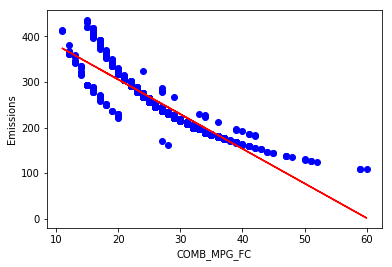

In [354]:
plt.scatter(x, y,  color='blue')
reg_line = line.coef_*x + line.intercept_
plt.plot(x, reg_line, '-r')
plt.xlabel("COMB_MPG_FC")
plt.ylabel("Emissions")

#### Model evaluation
- *Mean absolute error*: Average error
- *Mean Squared Error (MSE)*: Average of the squared error
- *Root Mean Squared Error* (RMSE)
- *R-squared* : not an error, represents data fitness to regression line
Goal: Maximise R-squared, minimise MSE

In [355]:
from sklearn import metrics

x_test = test_data[['COMB_MPG_FC']]
y_test = test_data.CO2EMISSIONS

y_pred = line.predict(x_test) # Calculate R-sqrd for the model using test data set

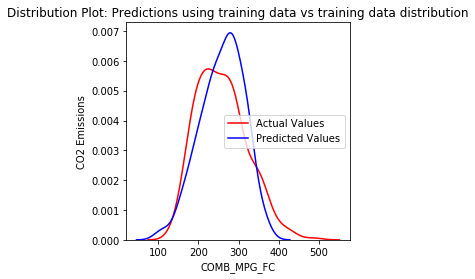

In [356]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ): # 
    width = 4 ; height = 4
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="red", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="blue", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel("COMB_MPG_FC")
    plt.ylabel("CO2 Emissions")
    plt.show() ; plt.close()

Title="Distribution Plot: Predictions using training data vs training data distribution"
DistributionPlot(y_test,y_pred,"Actual Values","Predicted Values",Title) 

In [357]:
print("R-squared: %.2f" % line.score(x,y)) # Calculate R-sqrd for the model using test data set
print("MAE: %.2f" % metrics.mean_absolute_error(y_test, y_pred))
print("MSE:%.2f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE:%.2f" %  np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared: 0.82
MAE: 18.06
MSE:728.08
RMSE:26.98


In [9]:
features = ['ENGINESIZE','CYLINDERS','City_FC','HWY_FC','COMB_FC','COMB_MPG_FC']
slr_evaluation = {'Feature': features,
#'Mean absolute error': [22.38,25.90,20.26,23.60,20.70,18.06],
'MSE x10': [85.989,113.18,81.954,100.843,83.780,72.808],
'R2-score (%)': [76,73,81,74,80,82]}
slr_df = pd.DataFrame(slr_evaluation
                      , columns=['Feature', 
                                 #'Mean absolute error',
                                 'MSE x10','R2-score (%)'])
slr_df.head()

,Feature,MSE x10,R2-score (%)
0,ENGINESIZE,85.989,76
1,CYLINDERS,113.180,73
2,City_FC,81.954,81
3,HWY_FC,100.843,74
4,COMB_FC,83.780,80


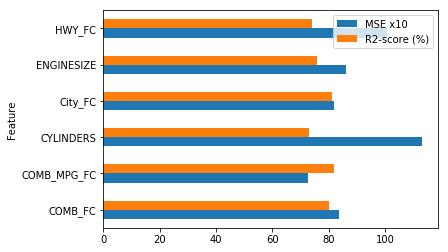

In [11]:
# Set Feature as the index to read dataframe, and read all the features in once cycle (.sum())
df = slr_df.groupby(['Feature'])[
    #'Mean absolute error',
    'MSE x10','R2-score (%)'].sum() 
df.plot(kind='barh') #(kind='bar')


Based on the MSE and R-squared values, the results suggest that, if any of these variables were to be used individually to predict car emissions, the **best emissions predictors** would most likely be **fuel consumption (City_FC and COMB_FC)**

#### Thank you for taking the time to look through this notebook. Please share your feedback to me via email by clicking on the image to be directed to my page 

<a href="https://wgova.github.io/Profile/"><img src = "https://wgova.github.io//Profile/assets/images/profile.png" width = 100, align = "center"></a>

